In [1]:
import pandas as pd
data=pd.read_csv("AirQuality.csv")

c:\users\huma\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
data.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990


In [3]:
data.info

<bound method DataFrame.info of        stn_code       sampling_date                        state   location  \
0           150  February - M021990               Andhra Pradesh  Hyderabad   
1           151  February - M021990               Andhra Pradesh  Hyderabad   
2           152  February - M021990               Andhra Pradesh  Hyderabad   
3           150     March - M031990               Andhra Pradesh  Hyderabad   
4           151     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP          24-12-2015                  West Bengal   ULUBERIA   
435738     SAMP          29-12-2015                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                   

In [4]:
#removing ambiguity
data.replace({'state': {r'Uttaranchal': 'Uttarakhand', }}, regex = True, inplace = True)

In [5]:
#removing unnecessary columns
data.drop(['agency', 'location_monitoring_station','stn_code','sampling_date','type','location'], axis=1, inplace=True)


In [6]:
data.head(20)

,state,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,4.7,7.5,NaN,NaN,NaN,03-01-1990
5,Andhra Pradesh,6.4,25.7,NaN,NaN,NaN,03-01-1990
6,Andhra Pradesh,5.4,17.1,NaN,NaN,NaN,04-01-1990
7,Andhra Pradesh,4.7,8.7,NaN,NaN,NaN,04-01-1990
8,Andhra Pradesh,4.2,23.0,NaN,NaN,NaN,04-01-1990
9,Andhra Pradesh,4.0,8.9,NaN,NaN,NaN,05-01-1990


In [8]:
#Removing duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows
data = data.drop_duplicates()
data.head(5)


,state,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,4.7,7.5,NaN,NaN,NaN,03-01-1990


In [9]:
data.isnull().sum()

#Replacing null values with mean
data['so2']=data['so2'].fillna(data['so2'].mean())
data['no2']=data['no2'].fillna(data['no2'].mean())
data['rspm']=data['rspm'].fillna(data['rspm'].mean())
data['spm']=data['spm'].fillna(data['spm'].mean())
data['pm2_5']=data['pm2_5'].fillna(data['pm2_5'].mean())

<ipython-input-9-e94efdd83196>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['so2']=data['so2'].fillna(data['so2'].mean())
<ipython-input-9-e94efdd83196>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no2']=data['no2'].fillna(data['no2'].mean())
<ipython-input-9-e94efdd83196>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [10]:
data.isnull().sum()


state    0
so2      0
no2      0
rspm     0
spm      0
pm2_5    0
date     7
dtype: int64

In [11]:
#Dropping date column
data.drop(['date'], axis=1, inplace=True)


c:\users\huma\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
data.isnull().sum()


state    0
so2      0
no2      0
rspm     0
spm      0
pm2_5    0
dtype: int64

In [13]:
data.shape

(433036, 6)

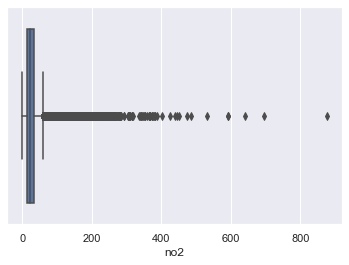

In [15]:
sns.boxplot(x=data['no2'])



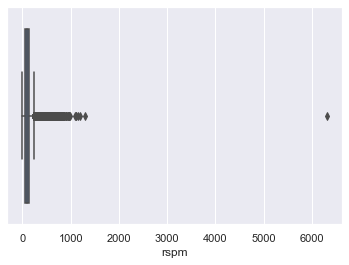

In [16]:
sns.boxplot(x=data['rspm'])


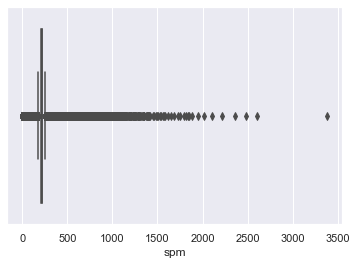

In [17]:
sns.boxplot(x=data['spm'])


In [20]:
#remving outliers
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR = q3-q1
data = data[~((data < (q1-1.5 * IQR)) |(data > (q3 + 1.5 * IQR))).any(axis=1)]

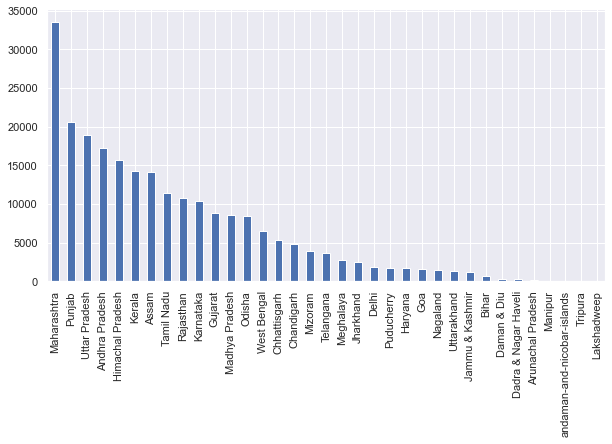

In [21]:
#staewise examples
data.state.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))


,so2,no2,rspm,spm,pm2_5
so2,1.000000e+00,4.490543e-01,2.450630e-01,-6.624818e-02,-1.100930e-13
no2,4.490543e-01,1.000000e+00,3.712663e-01,-8.614737e-03,-7.332673e-13
rspm,2.450630e-01,3.712663e-01,1.000000e+00,3.472579e-02,-1.413526e-13
spm,-6.624818e-02,-8.614737e-03,3.472579e-02,1.000000e+00,3.839354e-11
pm2_5,-1.100930e-13,-7.332673e-13,-1.413526e-13,3.839354e-11,1.000000e+00


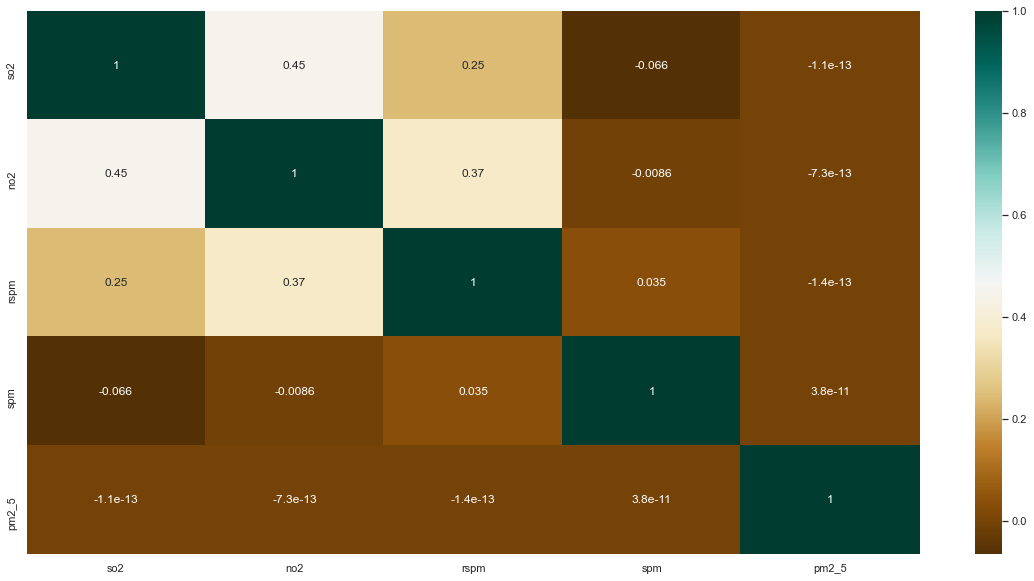

In [22]:
#finding corelation between gases
plt.figure(figsize=(20,10))
rel= data.corr()
sns.heatmap(rel,cmap='BrBG',annot=True)
rel

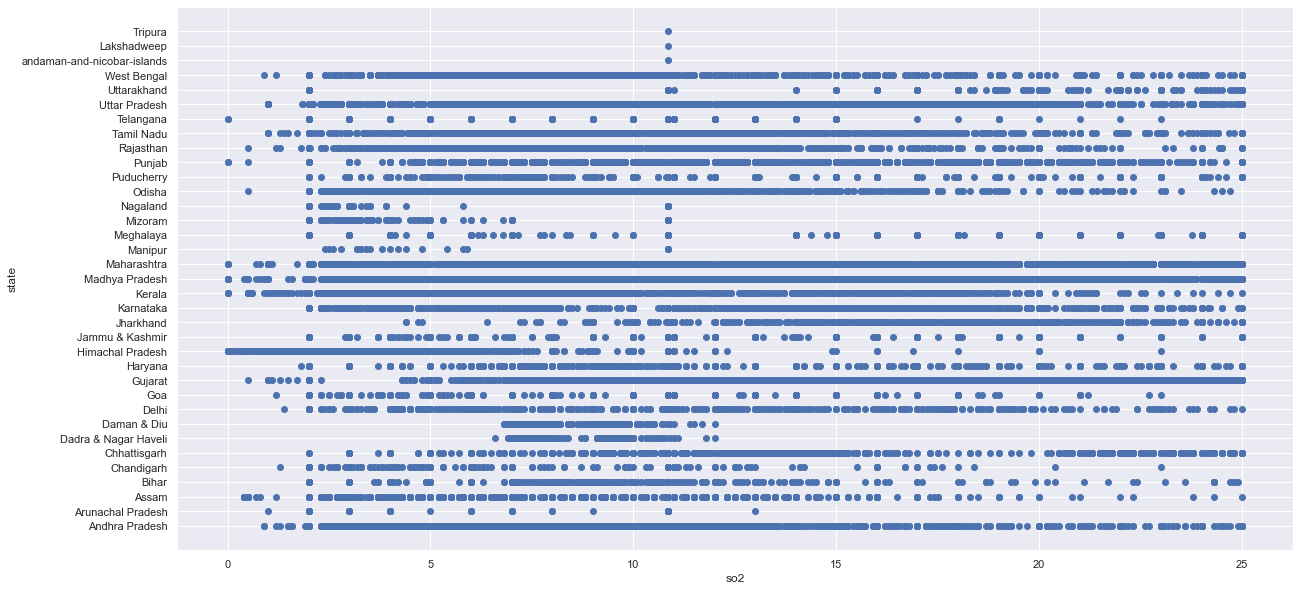

In [23]:
#so2 vs states
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['so2'], data['state'])
ax.set_xlabel('so2')
ax.set_ylabel('state')
plt.show()

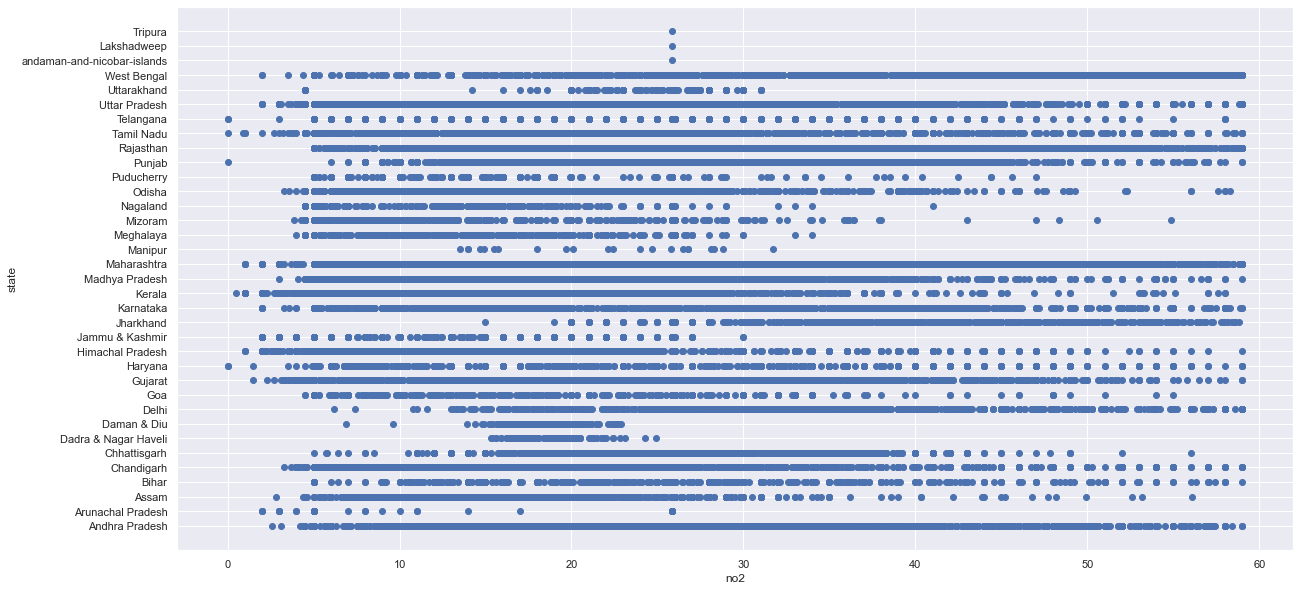

In [24]:
#no2 vs states
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['no2'], data['state'])
ax.set_xlabel('no2')
ax.set_ylabel('state')
plt.show()

In [26]:
labelencoder = LabelEncoder()
data['state'] = labelencoder.fit_transform(data['state'])
data


,state,so2,no2,rspm,spm,pm2_5
0,0,4.800000,17.400000,109.046572,221.319818,40.838833
1,0,3.100000,7.000000,109.046572,221.319818,40.838833
2,0,6.200000,28.500000,109.046572,221.319818,40.838833
3,0,6.300000,14.700000,109.046572,221.319818,40.838833
4,0,4.700000,7.500000,109.046572,221.319818,40.838833
...,...,...,...,...,...,...
435737,33,22.000000,50.000000,143.000000,221.319818,40.838833
435738,33,20.000000,46.000000,171.000000,221.319818,40.838833
435739,34,10.849839,25.868912,109.046572,221.319818,40.838833
435740,17,10.849839,25.868912,109.046572,221.319818,40.838833


In [27]:
#Defining x and y feature set
X = data[['so2', 'no2', 'rspm', 'spm', 'pm2_5']].values
X[0:5]
y = data['state'].values
y [0:5]


array([0, 0, 0, 0, 0])

In [34]:
#normalizing data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.68951729, -0.39383064,  0.20305562,  0.20733656,  0.        ],
       [-1.00099858, -1.31656581,  0.20305562,  0.20733656,  0.        ],
       [-0.43300329,  0.5910117 ,  0.20305562,  0.20733656,  0.        ],
       [-0.41468086, -0.63338689,  0.20305562,  0.20733656,  0.        ],
       [-0.70783972, -1.27220355,  0.20305562,  0.20733656,  0.        ]])

In [36]:
#Train, test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (187408, 5) (187408,)
Test set: (46852, 5) (46852,)


In [57]:
k = 20
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [58]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([19, 19, 19, 18, 19])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))